In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt
import numpy as np
import string
import textwrap
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, Dropout, Input, LSTM
from tensorflow.keras.models import Model

# Using Recurrent Neural Networks

Use Keras' IMDb review dataset. It consists of 25,000 reviews with a binary label representing a good or bad sentiment.

In [ ]:
# Omit reviews longer than this many words
max_sequence_len = 200

(X_train, y_train), (_, _) = imdb.load_data(maxlen=max_sequence_len)

In [ ]:
# https://stackoverflow.com/questions/42821330/restore-original-text-from-keras-s-imdb-dataset
# Needed to encode our own reviews later

word_dict = imdb.get_word_index()
for i in range(50):
  for key, value in word_dict.items():
    if value == i:
        print('(', key, ',', value, ')', sep = '', end = ',')

print()
print(len(word_dict))

word_dict = {k:(v+3) for k,v in word_dict.items()}
word_dict["<PAD>"] = 0
word_dict["<START>"] = 1
word_dict["<UNK>"] = 2
word_dict["<UNUSED>"] = 3

vocab_size = len(word_dict.keys())
print('Number of words in vocabulary: ', vocab_size)
for i in range(50):
  for key, value in word_dict.items():
    if value == i:
        print('(', key, ',', value, ')', sep = '', end = ',')

1641221/1641221 [==============================] - 0s 0us/step
(the,1),(and,2),(a,3),(of,4),(to,5),(is,6),(br,7),(in,8),(it,9),(i,10),(this,11),(that,12),(was,13),(as,14),(for,15),(with,16),(movie,17),(but,18),(film,19),(on,20),(not,21),(you,22),(are,23),(his,24),(have,25),(he,26),(be,27),(one,28),(all,29),(at,30),(by,31),(an,32),(they,33),(who,34),(so,35),(from,36),(like,37),(her,38),(or,39),(just,40),(about,41),(it's,42),(out,43),(has,44),(if,45),(some,46),(there,47),(what,48),(good,49),
88584
Number of words in vocabulary:  88588
(<PAD>,0),(<START>,1),(<UNK>,2),(<UNUSED>,3),(the,4),(and,5),(a,6),(of,7),(to,8),(is,9),(br,10),(in,11),(it,12),(i,13),(this,14),(that,15),(was,16),(as,17),(for,18),(with,19),(movie,20),(but,21),(film,22),(on,23),(not,24),(you,25),(are,26),(his,27),(have,28),(he,29),(be,30),(one,31),(all,32),(at,33),(by,34),(an,35),(they,36),(who,37),(so,38),(from,39),(like,40),(her,41),(or,42),(just,43),(about,44),(it's,45),(out,46),(has,47),(if,48),(some,49),

In [ ]:
# Needed to decode training data into readable text
inverse_word_dict = {value:key for key,value in word_dict.items()}

In [ ]:
print(X_train[-1])
X_train = pad_sequences(X_train, maxlen=max_sequence_len)
print(X_train[-1])

[1, 17, 6, 194, 337, 7, 4, 204, 22, 45, 254, 8, 106, 14, 123, 4, 12815, 270, 14437, 5, 16923, 12255, 732, 2098, 101, 405, 39, 14, 1034, 4, 1310, 9, 115, 50, 305, 12, 47, 4, 168, 5, 235, 7, 38, 111, 699, 102, 7, 4, 4039, 9245, 9, 24, 6, 78, 1099, 17, 2345, 16553, 21, 27, 9685, 6139, 5, 29043, 1603, 92, 1183, 4, 1310, 7, 4, 204, 42, 97, 90, 35, 221, 109, 29, 127, 27, 118, 8, 97, 12, 157, 21, 6789, 85010, 9, 6, 66, 78, 1099, 4, 631, 1191, 5, 2642, 272, 191, 1070, 6, 7585, 8, 2197, 70907, 10755, 544, 5, 383, 1271, 848, 1468, 12183, 497, 16876, 8, 1597, 8778, 19280, 21, 60, 27, 239, 9, 43, 8368, 209, 405, 10, 10, 12, 764, 40, 4, 248, 20, 12, 16, 5, 174, 1791, 72, 7, 51, 6, 1739, 22, 4, 204, 131, 9]
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     1
    1

In [ ]:
def encode_review(review, word_dict, maxlen):
  encoded_review = []
  for raw_word in review.split(' '):
    word = raw_word.strip().strip(string.punctuation).lower()
    if word is '' or word is '\n':
      continue
    try:
      encoded_review.append(word_dict[word])
    except KeyError as e:
      # raise KeyError(f'{e} not in word dictionary, review not encoded.')
      continue
  return pad_sequences(np.array(encoded_review).reshape(1,-1), maxlen=maxlen)

def decode_review(encoded_review, inverse_word_dict):
  sentence = []
  for encoded_word in encoded_review:
    if encoded_word == 0:
      continue
    sentence.append(inverse_word_dict[encoded_word])
  w = textwrap.TextWrapper(width=120,break_long_words=False,replace_whitespace=False)
  return '\n'.join(w.wrap(' '.join(sentence)))

<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-6-39d14e0cb5da>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if word is '' or word is '\n':
<ipython-input-6-39d14e0cb5da>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if word is '' or word is '\n':


Let's take a look at a review in our training data:



In [ ]:
print(decode_review(X_train[-1], inverse_word_dict), end='\n\n')

print('Sentiment: ', y_train[-1])

<START> as a big fan of the original film it's hard to watch this show the garish set decor and harshly lighted sets rob
any style from this remake the mood is never there instead it has the look and feel of so many television movies of the
seventies crenna is not a bad choice as walter neff but his snappy wardrobe and swank apartment don't fit the mood of
the original or make him an interesting character he does his best to make it work but samantha egger is a really bad
choice the english accent and california looks can't hold a candle to barbara stanwick's velvet voice and sex appeal lee
j cobb tries mightily to fashion barton keyes but even his performance is just gruff without style br br it feels like
the tv movie it was and again reminds me of what a remarkable film the original still is

Sentiment:  0


Now let's create a normal fully-connected model:

In [ ]:
input_layer = Input(shape=(max_sequence_len))

x = Dense(1024, activation='relu')(input_layer)

x = Dense(1024, activation='relu')(x)

x = Dense(512, activation='relu')(x)

x = Dense(256, activation='relu')(x)

x = Dense(128, activation='relu')(x)

x = Dense(64, activation='relu')(x)

x = Dense(1, activation='sigmoid')(x)

sentiment_model = Model(input_layer, x)

In [ ]:
sentiment_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 dense (Dense)               (None, 1024)              205824    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256  

In [ ]:
sentiment_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(2e-4),
              metrics=['accuracy'])

In [ ]:
history = sentiment_model.fit(X_train, y_train.reshape(-1,1), batch_size=256, epochs=10, validation_split=0.2, shuffle=True)

Epoch 1/10
45/45 [==============================] - 6s 13ms/step - loss: 75.6735 - accuracy: 0.4939 - val_loss: 26.3690 - val_accuracy: 0.5111
Epoch 2/10
45/45 [==============================] - 0s 7ms/step - loss: 15.8615 - accuracy: 0.5803 - val_loss: 19.4654 - val_accuracy: 0.5205
Epoch 3/10
45/45 [==============================] - 0s 6ms/step - loss: 6.7784 - accuracy: 0.6752 - val_loss: 16.8082 - val_accuracy: 0.5170
Epoch 4/10
45/45 [==============================] - 0s 7ms/step - loss: 3.1724 - accuracy: 0.7709 - val_loss: 16.4654 - val_accuracy: 0.5181
Epoch 5/10
45/45 [==============================] - 0s 7ms/step - loss: 1.7799 - accuracy: 0.8298 - val_loss: 15.5793 - val_accuracy: 0.5209
Epoch 6/10
45/45 [==============================] - 0s 6ms/step - loss: 1.0367 - accuracy: 0.8734 - val_loss: 15.9362 - val_accuracy: 0.5279
Epoch 7/10
45/45 [==============================] - 0s 7ms/step - loss: 0.5958 - accuracy: 0.9072 - val_loss: 15.1727 - val_accuracy: 0.5276
Epoch 8/10

As you can see, it's difficult for the model to learn.

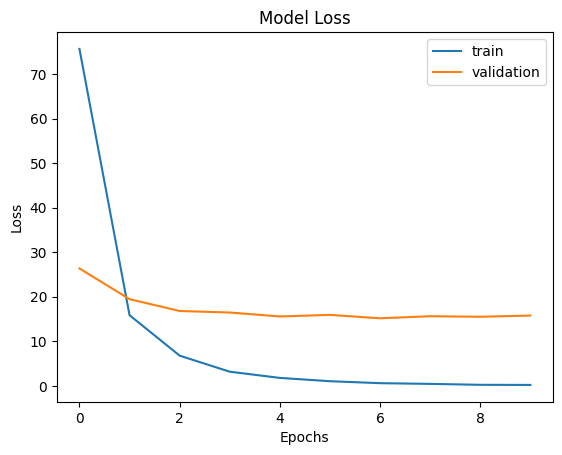

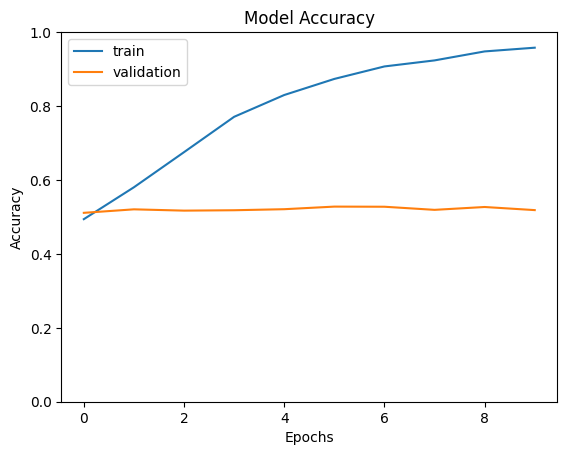

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.ylim([0,1])
plt.show()

Now let's replace the first dense layer with an LSTM layer.

In [ ]:
input_layer = Input(shape=(max_sequence_len))
x = Embedding(vocab_size, 128)(input_layer)

x = LSTM(64)(x)

x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.8)(x)

x = Dense(1, activation='sigmoid')(x)
sentiment_model = Model(input_layer, x)

In [ ]:
sentiment_model.summary()
# Embedding parameters = 88588 * 128
# LSTM parameters: [(num_units (w_aa) + input_dim (w_xa) + 1) * num_units] * 4
# (num_units + input_dim + 1) is for [w_aa + w_xa + bias] which the size of w_aa is equal to the num_units and the size of w_xa is equal to the input_dim
# 4 in LSTM unit is for W_forget, W_input, W_output, W_cell
# num_units = 64, input_dim = 128
# (128 + 64 + 1) * 64 * 4 = 49408

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 128)          11339264  
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0   

In [ ]:
sentiment_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(2e-4),
              metrics=['accuracy'])

In [ ]:
history = sentiment_model.fit(X_train, y_train.reshape(-1,1), batch_size=256, epochs=5, validation_split=0.2, shuffle=True)

Epoch 1/5
45/45 [==============================] - 9s 120ms/step - loss: 0.6926 - accuracy: 0.5229 - val_loss: 0.6923 - val_accuracy: 0.5827
Epoch 2/5
45/45 [==============================] - 5s 117ms/step - loss: 0.6915 - accuracy: 0.5343 - val_loss: 0.6897 - val_accuracy: 0.6300
Epoch 3/5
45/45 [==============================] - 4s 95ms/step - loss: 0.6815 - accuracy: 0.6005 - val_loss: 0.6466 - val_accuracy: 0.7287
Epoch 4/5
45/45 [==============================] - 3s 79ms/step - loss: 0.5618 - accuracy: 0.7462 - val_loss: 0.4406 - val_accuracy: 0.8277
Epoch 5/5
45/45 [==============================] - 5s 111ms/step - loss: 0.3846 - accuracy: 0.8570 - val_loss: 0.3121 - val_accuracy: 0.8750


We are overfitting a little bit, but as you can see we learnd a whole lot better.

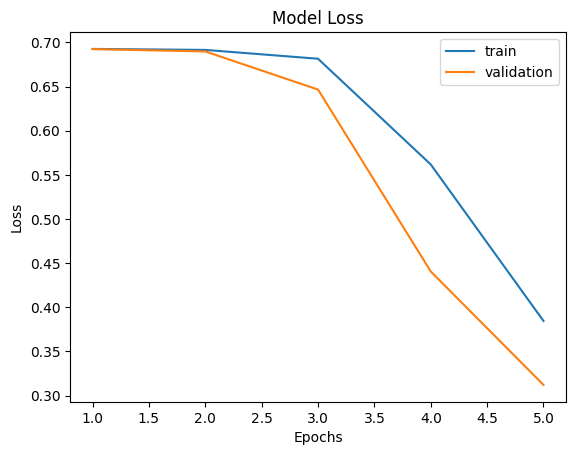

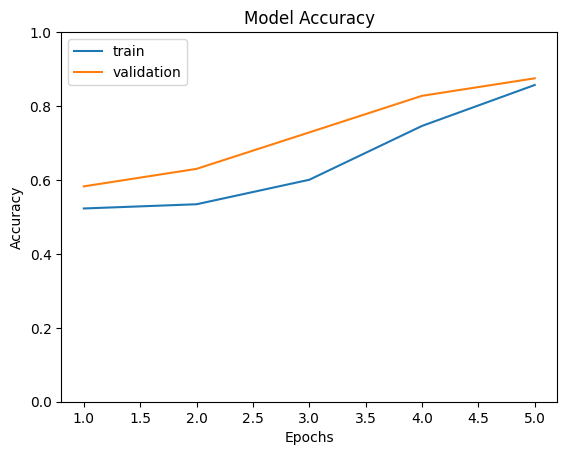

In [ ]:
plt.plot([x+1 for x in range(5)], history.history['loss'])
plt.plot([x+1 for x in range(5)], history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

plt.plot([x+1 for x in range(5)], history.history['accuracy'])
plt.plot([x+1 for x in range(5)], history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.ylim([0,1])
plt.show()

Let's take some reviews from Rotten Tomatoes and see what our model classifies them as:

In [ ]:
# Reviews from Rotten Tomatoes:

bad = '''Dull, overlong, and never remotely involving, "Scoob!" makes the silly Matthew Lillard-starring live action films seem rather quaint and joyful by comparison.'''
good = '''A film that always has two thoughts in its head at once, a spectacular epic and tightly wound chamber piece, chicly sophisticated, brutal as a hammer.'''

In [ ]:
review = encode_review(bad, word_dict, max_sequence_len)
output = sentiment_model.predict(review)
print('Model output: ', output)
print('Prediction: ', round(output[0][0]))

1/1 [==============================] - 0s 367ms/step
Model output:  [[0.4312869]]
Prediction:  0


In [ ]:
review = encode_review(good, word_dict, max_sequence_len)
output = sentiment_model.predict(review)
print('Model output: ', output)
print('Prediction: ', round(output[0][0]))

1/1 [==============================] - 0s 19ms/step
Model output:  [[0.72495407]]
Prediction:  1
